# Question and Answer Chat Bots

In [3]:
import pickle
import numpy as np

In [4]:
with open("train_qa.txt", "rb") as fp: 
    train_data =  pickle.load(fp)

In [5]:
with open("test_qa.txt", "rb") as fp:
    test_data =  pickle.load(fp)

----

### Type and Len of data


In [6]:
type(test_data)

list

In [7]:
type(train_data)

list

In [8]:
len(test_data)

1000

In [9]:
len(train_data)

10000

In [10]:
train_data[0]

(['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
 'no')

In [11]:
#Story
' '.join(train_data[0][0])

'Mary moved to the bathroom . Sandra journeyed to the bedroom .'

In [12]:
#Question
' '.join(train_data[0][1])

'Is Sandra in the hallway ?'

In [13]:
#Answer
train_data[0][2]

'no'

-----

## Setting up Vocabulary of All Words

In [14]:
# Create a set that holds the vocab words
vocab = set()

In [15]:
all_data = test_data + train_data

In [16]:
for story, question , answer in all_data:
    vocab = vocab.union(set(story))
    vocab = vocab.union(set(question))

In [17]:
vocab.add('no')
vocab.add('yes')

In [18]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [19]:
vocab_len = len(vocab) + 1 #we add an extra space to hold a 0 for Keras's pad_sequences

In [20]:
max_story_len = max([len(data[0]) for data in all_data])

In [21]:
max_story_len

156

In [22]:
max_question_len = max([len(data[1]) for data in all_data])

In [23]:
max_question_len

6

## Vectorizing the Data

In [24]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [25]:
# Reserve 0 for pad_sequences
vocab_size = len(vocab) + 1

-----------

In [26]:
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

Using TensorFlow backend.


In [27]:
# integer encode sequences of words
tokenizer = Tokenizer(filters=[])
tokenizer.fit_on_texts(vocab)

In [28]:
tokenizer.word_index

{'daniel': 1,
 'the': 2,
 'bathroom': 3,
 'journeyed': 4,
 'up': 5,
 'mary': 6,
 'left': 7,
 'discarded': 8,
 'to': 9,
 'garden': 10,
 'travelled': 11,
 'took': 12,
 '.': 13,
 'back': 14,
 '?': 15,
 'milk': 16,
 'kitchen': 17,
 'grabbed': 18,
 'got': 19,
 'sandra': 20,
 'john': 21,
 'apple': 22,
 'put': 23,
 'football': 24,
 'office': 25,
 'dropped': 26,
 'is': 27,
 'no': 28,
 'in': 29,
 'went': 30,
 'yes': 31,
 'hallway': 32,
 'there': 33,
 'bedroom': 34,
 'down': 35,
 'moved': 36,
 'picked': 37}

In [29]:
train_story_text = []
train_question_text = []
train_answers = []

for story,question,answer in train_data:
    train_story_text.append(story)
    train_question_text.append(question)

In [30]:
train_story_seq = tokenizer.texts_to_sequences(train_story_text)

In [31]:
len(train_story_text)

10000

In [32]:
len(train_story_seq)

10000

In [33]:
# word_index = tokenizer.word_index

### Functionalize Vectorization

In [34]:
def vectorize_stories(data, word_index=tokenizer.word_index, max_story_len=max_story_len,max_question_len=max_question_len):
    '''
    INPUT: 
    
    data: consisting of Stories,Queries,and Answers
    word_index: word index dictionary from tokenizer
    max_story_len: the length of the longest story (used for pad_sequences function)
    max_question_len: length of the longest question (used for pad_sequences function)


    OUTPUT:
    
    Vectorizes the stories,questions, and answers into padded sequences. We first loop for every story, query , and
    answer in the data. Then we convert the raw words to an word index value. Then we append each set to their appropriate
    output list. Then once we have converted the words to numbers, we pad the sequences so they are all of equal length.
    
    Returns this in the form of a tuple (X,Xq,Y) (padded based on max lengths)
    '''
    
    
    # X = Stories
    X = []
    # Xq = Question
    Xq = []
    # Y = Answer
    Y = []
    
    
    for story, query, answer in data:
        x = [word_index[word.lower()] for word in story]
        xq = [word_index[word.lower()] for word in query]
        y = np.zeros(len(word_index) + 1)
        y[word_index[answer]] = 1
        X.append(x)
        Xq.append(xq)
        Y.append(y)
    return (pad_sequences(X, maxlen=max_story_len),pad_sequences(Xq, maxlen=max_question_len), np.array(Y))

In [35]:
inputs_train, queries_train, answers_train = vectorize_stories(train_data)

In [36]:
inputs_test, queries_test, answers_test = vectorize_stories(test_data)

In [37]:
inputs_test

array([[ 0,  0,  0, ...,  2, 34, 13],
       [ 0,  0,  0, ...,  2, 10, 13],
       [ 0,  0,  0, ...,  2, 10, 13],
       ...,
       [ 0,  0,  0, ...,  2, 22, 13],
       [ 0,  0,  0, ...,  2, 10, 13],
       [ 0,  0,  0, ..., 22, 33, 13]])

In [38]:
queries_test

array([[27, 21, 29,  2, 17, 15],
       [27, 21, 29,  2, 17, 15],
       [27, 21, 29,  2, 10, 15],
       ...,
       [27,  6, 29,  2, 34, 15],
       [27, 20, 29,  2, 10, 15],
       [27,  6, 29,  2, 10, 15]])

In [39]:
answers_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [40]:
sum(answers_test)

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0., 503.,   0.,   0., 497.,   0.,
         0.,   0.,   0.,   0.,   0.])

In [41]:
tokenizer.word_index['yes']

31

In [42]:
tokenizer.word_index['no']

28

## Create the Model using Keras

In [43]:
from keras.models import Sequential, Model
from keras.layers.embeddings import Embedding
from keras.layers import Input, Activation, Dense, Permute, Dropout
from keras.layers import add, dot, concatenate
from keras.layers import LSTM

In [44]:
input_sequence = Input((max_story_len,))
question = Input((max_question_len,))

## Encoders

In [45]:
# Input gets embedded to a sequence of vectors
input_encoder_m = Sequential()
input_encoder_m.add(Embedding(input_dim=vocab_size,output_dim=64))
input_encoder_m.add(Dropout(0.3))

# This encoder will output:
# (samples, story_maxlen, embedding_dim)

In [46]:
# embed the input into a sequence of vectors of size query_maxlen
input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim=vocab_size,output_dim=max_question_len))
input_encoder_c.add(Dropout(0.3))
# output: (samples, story_maxlen, query_maxlen)

### Question Encoder

In [47]:
question_encoder = Sequential()
question_encoder.add(Embedding(input_dim=vocab_size,
                               output_dim=64,
                               input_length=max_question_len))
question_encoder.add(Dropout(0.3))
# output: (samples, query_maxlen, embedding_dim)

### Encode the Sequences

In [48]:
# encode input sequence and questions
# to sequences of dense vectors
input_encoded_m = input_encoder_m(input_sequence)
input_encoded_c = input_encoder_c(input_sequence)
question_encoded = question_encoder(question)

In [49]:
# shape: `(samples, story_maxlen, query_maxlen)`
match = dot([input_encoded_m, question_encoded], axes=(2, 2))
match = Activation('softmax')(match)

In [50]:
# add the match matrix with the second input vector sequence
response = add([match, input_encoded_c])  # (samples, story_maxlen, query_maxlen)
response = Permute((2, 1))(response)  # (samples, query_maxlen, story_maxlen)

In [51]:
# concatenate the match matrix with the question vector sequence
answer = concatenate([response, question_encoded])

In [52]:
answer

<tf.Tensor 'concatenate_1/concat:0' shape=(?, 6, 220) dtype=float32>

In [53]:
answer = LSTM(32)(answer)

In [54]:
answer = Dropout(0.5)(answer)
answer = Dense(vocab_size)(answer)  # (samples, vocab_size)

In [55]:
answer = Activation('softmax')(answer)

# build the final model
model = Model([input_sequence, question], answer)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',
              metrics=['accuracy'])

In [56]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 156)          0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 6)            0                                            
__________________________________________________________________________________________________
sequential_1 (Sequential)       multiple             2432        input_1[0][0]                    
__________________________________________________________________________________________________
sequential_3 (Sequential)       (None, 6, 64)        2432        input_2[0][0]                    
____________________________________________________________________________________________

In [63]:
# train on 15 epochs
history_1 = model.fit([inputs_train, queries_train], answers_train,batch_size=32,epochs=15,validation_data=([inputs_test, queries_test], answers_test))


# accuracy = 64% (92% after running through after second training)

Train on 10000 samples, validate on 1000 samples
Epoch 1/15
10000/10000 [==============================] - 4s 435us/step - loss: 0.2005 - accuracy: 0.9148 - val_loss: 0.5760 - val_accuracy: 0.8170
Epoch 2/15
10000/10000 [==============================] - 4s 420us/step - loss: 0.1987 - accuracy: 0.9137 - val_loss: 0.5667 - val_accuracy: 0.8100
Epoch 3/15
10000/10000 [==============================] - 4s 405us/step - loss: 0.1954 - accuracy: 0.9180 - val_loss: 0.6131 - val_accuracy: 0.8080
Epoch 4/15
10000/10000 [==============================] - 4s 406us/step - loss: 0.2052 - accuracy: 0.9137 - val_loss: 0.5804 - val_accuracy: 0.8190
Epoch 5/15
10000/10000 [==============================] - 4s 399us/step - loss: 0.1950 - accuracy: 0.9162 - val_loss: 0.5926 - val_accuracy: 0.8010
Epoch 6/15
10000/10000 [==============================] - 4s 434us/step - loss: 0.1928 - accuracy: 0.9204 - val_loss: 0.5766 - val_accuracy: 0.8070
Epoch 7/15
10000/10000 [==============================] - 4s 43

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


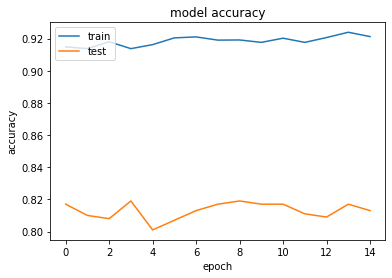

In [65]:
import matplotlib.pyplot as plt
%matplotlib inline
print(history_1.history.keys())
# summarize history for accuracy
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [58]:
# train on 120 epochs
history = model.fit([inputs_train, queries_train], answers_train,batch_size=32,epochs=120,validation_data=([inputs_test, queries_test], answers_test))

Train on 10000 samples, validate on 1000 samples
Epoch 1/120
10000/10000 [==============================] - 5s 483us/step - loss: 0.6188 - accuracy: 0.6661 - val_loss: 0.6051 - val_accuracy: 0.6820
Epoch 2/120
10000/10000 [==============================] - 4s 442us/step - loss: 0.6018 - accuracy: 0.6818 - val_loss: 0.5866 - val_accuracy: 0.6930
Epoch 3/120
10000/10000 [==============================] - 5s 465us/step - loss: 0.5835 - accuracy: 0.7047 - val_loss: 0.5712 - val_accuracy: 0.7110
Epoch 4/120
10000/10000 [==============================] - 5s 462us/step - loss: 0.5599 - accuracy: 0.7190 - val_loss: 0.5301 - val_accuracy: 0.7480
Epoch 5/120
10000/10000 [==============================] - 4s 444us/step - loss: 0.5367 - accuracy: 0.7389 - val_loss: 0.5079 - val_accuracy: 0.7540
Epoch 6/120
10000/10000 [==============================] - 5s 511us/step - loss: 0.5191 - accuracy: 0.7525 - val_loss: 0.5350 - val_accuracy: 0.7480
Epoch 7/120
10000/10000 [==============================] 

10000/10000 [==============================] - 4s 425us/step - loss: 0.2807 - accuracy: 0.8761 - val_loss: 0.3799 - val_accuracy: 0.8310
Epoch 56/120
10000/10000 [==============================] - 4s 423us/step - loss: 0.2776 - accuracy: 0.8794 - val_loss: 0.4010 - val_accuracy: 0.8280
Epoch 57/120
10000/10000 [==============================] - 4s 444us/step - loss: 0.2787 - accuracy: 0.8797 - val_loss: 0.4079 - val_accuracy: 0.8320
Epoch 58/120
10000/10000 [==============================] - 4s 426us/step - loss: 0.2808 - accuracy: 0.8780 - val_loss: 0.3908 - val_accuracy: 0.8250
Epoch 59/120
10000/10000 [==============================] - 4s 429us/step - loss: 0.2699 - accuracy: 0.8822 - val_loss: 0.4330 - val_accuracy: 0.8280
Epoch 60/120
10000/10000 [==============================] - 4s 431us/step - loss: 0.2713 - accuracy: 0.8832 - val_loss: 0.3823 - val_accuracy: 0.8210
Epoch 61/120
10000/10000 [==============================] - 4s 441us/step - loss: 0.2711 - accuracy: 0.8824 - val

10000/10000 [==============================] - 4s 439us/step - loss: 0.2054 - accuracy: 0.9134 - val_loss: 0.5417 - val_accuracy: 0.8280
Epoch 110/120
10000/10000 [==============================] - 4s 432us/step - loss: 0.2069 - accuracy: 0.9121 - val_loss: 0.5290 - val_accuracy: 0.8150
Epoch 111/120
10000/10000 [==============================] - 4s 432us/step - loss: 0.2054 - accuracy: 0.9124 - val_loss: 0.5459 - val_accuracy: 0.8160
Epoch 112/120
10000/10000 [==============================] - 4s 440us/step - loss: 0.2088 - accuracy: 0.9130 - val_loss: 0.5599 - val_accuracy: 0.8130
Epoch 113/120
10000/10000 [==============================] - 4s 430us/step - loss: 0.2093 - accuracy: 0.9118 - val_loss: 0.5788 - val_accuracy: 0.8120
Epoch 114/120
10000/10000 [==============================] - 4s 421us/step - loss: 0.2049 - accuracy: 0.9161 - val_loss: 0.5182 - val_accuracy: 0.8180
Epoch 115/120
10000/10000 [==============================] - 4s 431us/step - loss: 0.2071 - accuracy: 0.9112

In [59]:
#Save the trained model for future use
filename = 'chatbot_120_epochs.h5'
model.save(filename)

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


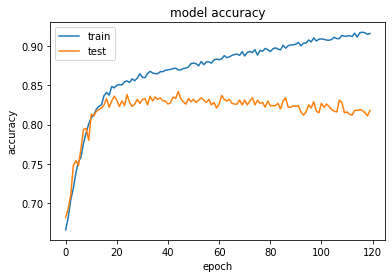

In [61]:
import matplotlib.pyplot as plt
%matplotlib inline
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Evaluating on Given Test Set

In [66]:
model.load_weights(filename)
pred_results = model.predict(([inputs_test, queries_test]))

In [67]:
test_data[0][0]

['Mary',
 'got',
 'the',
 'milk',
 'there',
 '.',
 'John',
 'moved',
 'to',
 'the',
 'bedroom',
 '.']

In [68]:
story =' '.join(word for word in test_data[0][0])
print(story)

Mary got the milk there . John moved to the bedroom .


In [69]:
query = ' '.join(word for word in test_data[0][1])
print(query)

Is John in the kitchen ?


In [70]:
print("True Test Answer from Data is:",test_data[0][2])

True Test Answer from Data is: no
